In [9]:
import geopandas as gpd
import pandas as pd
import fiona
import matplotlib.pyplot as plt
from shapely.geometry import Point
from tqdm import tqdm
import yaml
import os

# Load configuration
with open('../../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

def resolve_path(relative_path):
    return os.path.join(config['base_path'], relative_path)

/tmp/ipykernel_289008/77558415.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)
Creating geometries: 1019265it [00:06, 167979.72it/s]
Saving file: 100%|██████████| 1019265/1019265 [01:14<00:00, 13741.10it/s]


         X          Y  Liters_Second                  geometry
0  9.41405  37.251192            3.0  POINT (9.41405 37.25119)
1  9.46405  37.251192            3.0  POINT (9.46405 37.25119)
2  9.51405  37.251192            3.0  POINT (9.51405 37.25119)
3  9.56405  37.251192            3.0  POINT (9.56405 37.25119)
4  9.61405  37.251192           22.5  POINT (9.61405 37.25119)


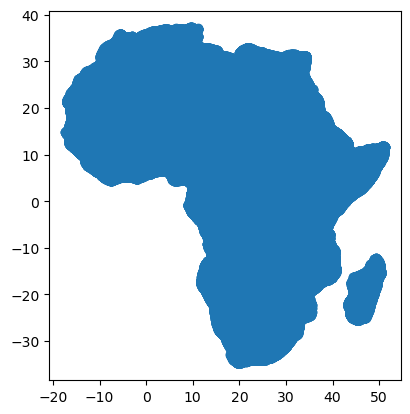

In [10]:
# Enable tqdm for Pandas apply function
tqdm.pandas()

# Load the data with a progress bar
df = pd.read_csv(resolve_path(config['Groundwater_Productivity_path']), delim_whitespace=True)

# Create geometry for coordinates with a progress bar
geometry = [Point(xy) for xy in tqdm(zip(df.X, df.Y), desc="Creating geometries")]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# Rename column 'GWPROD_V2'
gdf.rename(columns={'GWPROD_V2': 'Liters_Second'}, inplace=True)

# Reassign values with a progress bar
value_map = {'VH': 20.0, 'H': 22.5, 'M': 3.0, 'LM': 0.75, 'L': 0.3, 'VL': 0.1}
gdf['Liters_Second'] = gdf['Liters_Second'].progress_apply(lambda x: value_map.get(x, x))

# Save file with a progress bar
with tqdm(total=len(gdf), desc="Saving file") as pbar:
    gdf.to_file(resolve_path(config['Groundwater_Prod_gpkg_path']), layer='groundwater', driver='GPKG')
    pbar.update(len(gdf))

print(gdf.head())
gdf.plot()
plt.show()

-overlay cropland and groundwater data


In [ ]:
gdf.set_crs(epsg=4326, inplace = True)
groundwater_